In [1]:
# Construction of a monotone fuzzy decision tree using
# the fuzzy rank discrimination measures introduced in
#
# C. Marsala and D. Petturiti.
# Splitting Rules for Monotone Fuzzy Decision Trees.
# In: S. Massanet, S. Montes, D. Ruiz-Aguilera, and M. González-Hidalgo (Eds.),
# Fuzzy Logic and Technology, and Aggregation Operators,
# Volume 14069 of Lecture Notes in Computer Science, Springer, pp. 161-173, 2023.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Generate a fuzzy partition in the sense of Ruspini

In [4]:
def low(x):
    if 0 <= x and x < 2:
        return 1
    if 2 <= x and x < 4:
        return -x/2. + 2
    return 0

In [5]:
def medium(x):
    if 2 <= x and x < 4:
        return x/2. - 1
    if 4 <= x and x < 6:
        return 1
    if 6 <= x and x < 8:
        return -x/2. + 4
    return 0

In [6]:
def high(x):
    if 6 <= x and x < 8:
        return x/2. - 3
    if 8 <= x and x <= 10:
        return 1
    return 0

In [7]:
x = np.arange(0,10.5,0.5)
low_v = np.vectorize(low, otypes=[np.float32])
medium_v = np.vectorize(medium, otypes=[np.float32])
high_v = np.vectorize(high, otypes=[np.float32])

In [8]:
y_low = low_v(x)
y_medium = medium_v(x)
y_high = high_v(x)

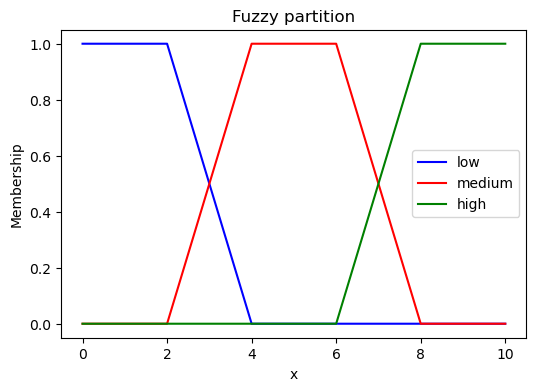

In [9]:
plt.figure(figsize=(6, 4))
plt.title('Fuzzy partition')
plt.plot(x, y_low,c='blue', label='low')
plt.plot(x, y_medium,c='red', label='medium')
plt.plot(x, y_high,c='green', label='high')
plt.xlabel('x')
plt.ylabel('Membership')
plt.legend()
plt.savefig('Partition.png', dpi=300)

In [10]:
# Generate a fuzzy dataset

In [11]:
n = 1000

In [12]:
rng = np.random.default_rng(0)
A = rng.uniform(low=0, high=10, size=(n, 3))
A

array([[6.36961687, 2.69786714, 0.40973524],
       [0.16527636, 8.13270239, 9.12755577],
       [6.06635776, 7.29496561, 5.43624991],
       ...,
       [1.02789398, 6.0866026 , 4.38097218],
       [9.52057033, 1.28335372, 7.78216809],
       [0.2483448 , 2.07652949, 3.0052863 ]])

In [13]:
A1 = A[:, 0]
A2 = A[:, 1]
A3 = A[:, 2]
Lambda = np.maximum(np.maximum(A1,A2**2 / 10), A2**3 / 100)

In [14]:
a1 = np.array([low_v(A1), medium_v(A1), high_v(A1)]).T
a2 = np.array([low_v(A2), medium_v(A2), high_v(A2)]).T
a3 = np.array([low_v(A3), medium_v(A3), high_v(A3)]).T
l = np.array([low_v(Lambda), medium_v(Lambda), high_v(Lambda)]).T

In [15]:
# Functions to implement the fuzzy dominant sets

In [16]:
def P_less(p_i, p_h):
    tot = 0
    for s in range(3):
        for q in range(3):
            if s < q:
                tot += p_i[s] * p_h[q]
    return tot

In [17]:
def P_greater(p_i, p_h):
    tot = 0
    for s in range(3):
        for q in range(3):
            if s > q:
                tot += p_i[s] * p_h[q]
    return tot

In [18]:
def R_rel(a):
    R = np.zeros([len(a), len(a)])
    P = np.zeros([len(a), len(a)])
    I = np.zeros([len(a), len(a)])
    for i in range(len(a)):
        for h in range(len(a)):
            if i == h:
                P[i, h] = 0
                I[i, h] = 1
            else:
                P[i, h] = max(P_less(a[i], a[h]) - P_greater(a[i], a[h]),0)
                I[i, h] = 1 - abs(P_less(a[i], a[h]) - P_greater(a[i], a[h]))
            R[i, h] = P[i, h] + I[i, h]
    return R

In [19]:
# Functions to implement the fuzzy rank discrimination measures

In [20]:
# Fuzzy interection based on the Lukasiewicz t-norm
def Luk_int(A, B):
    return np.maximum(A + B - 1, 0)

In [21]:
# Fuzzy rank Gini discrimination measure
def H_G(Rl, Ra):
    tot = 0
    for i in range(len(Rl)):
        tot += (1 - (Luk_int(Rl[i,:], Ra[i,:]).sum() / Ra[i,:].sum()))
    return tot / len(Rl)

In [22]:
# Fuzzy rank Shannon discrimination measure
def H_S(Rl, Ra):
    tot = 0
    for i in range(len(Rl)):
        tot += - (np.log((Luk_int(Rl[i,:], Ra[i,:]).sum() / Ra[i,:].sum())) / np.log(2))
    return tot / len(Rl)

In [23]:
# Generate the dominant sets
R1 = R_rel(a1)
R2 = R_rel(a2)
R3 = R_rel(a3)
Rl = R_rel(l)

In [24]:
# Compute the fuzzy rank Gini discrimination measure

In [25]:
H_G(Rl, R1)

0.14271927855111036

In [26]:
H_G(Rl, R2)

0.24185624098392436

In [27]:
H_G(Rl, R3)

0.31307810276271303

In [28]:
# Compute the fuzzy rank Shannon discrimination measure

In [29]:
H_S(Rl, R1)

0.24751438830073733

In [30]:
H_S(Rl, R2)

0.4546588964279144

In [31]:
H_S(Rl, R3)

0.6273763034997201

In [32]:
# Splitting thresholds
a_l_low_0 = l[:,0].mean()
a_l_medium_0 = l[:,1].mean()
a_l_high_0 = l[:,1].mean()
a_l_0 = max(a_l_low_0,a_l_medium_0,a_l_high_0)
print(a_l_low_0, a_l_medium_0, a_l_high_0, a_l_0)

0.15964773 0.4265955 0.4265955 0.4265955


In [33]:
# Percentages of objects above the thresholds
I_C_low = l[:,0] >= a_l_0
p_low = len(l[I_C_low]) / len(l)
I_C_medium = l[:,1] >= a_l_0
p_medium = len(l[I_C_medium]) / len(l)
I_C_high = l[:,2] >= a_l_0
p_high = len(l[I_C_high]) / len(l)
print(p_low, p_medium, p_high)

0.16 0.466 0.431


In [34]:
a3[:,0].mean()

0.2974377

In [35]:
a3[:,1].mean()

0.4075321

In [36]:
a3[:,2].mean()

0.2950302

In [37]:
a3[:,0].mean() + a3[:,1].mean() + a3[:,2].mean()

1.0

In [38]:
I_low = a1[:,0] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
I_medium = a1[:,1] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
I_high = a1[:,2] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
print(len(I_low[I_low == True]), len(I_medium[I_medium == True]), len(I_high[I_high == True]))

322 440 322


In [39]:
I_low_medium = I_low & I_medium
len(I_low_medium[I_low_medium == True])

42

In [40]:
I_low_high = I_low & I_high
len(I_low_high[I_low_high == True])

0

In [41]:
I_medium_high = I_medium & I_high
len(I_medium_high[I_medium_high == True])

42

In [42]:
# LOW
a1_1_low = a1[I_low]
a2_1_low = a2[I_low]
a3_1_low = a3[I_low]
l_1_low = l[I_low]

In [43]:
I_C_low = l_1_low[:,0] >= max(l_1_low[:,0].mean(), l_1_low[:,1].mean(), l_1_low[:,2].mean())
len(l_1_low[I_C_low]) / len(l_1_low)

0.4813664596273292

In [44]:
I_C_low = l_1_low[:,1] >= max(l_1_low[:,0].mean(), l_1_low[:,1].mean(), l_1_low[:,2].mean())
len(l_1_low[I_C_low]) / len(l_1_low)

0.40062111801242234

In [45]:
I_C_low = l_1_low[:,2] >= max(l_1_low[:,0].mean(), l_1_low[:,1].mean(), l_1_low[:,2].mean())
len(l_1_low[I_C_low]) / len(l_1_low)

0.16149068322981366

In [46]:
# Generate the dominant sets
R2 = R_rel(a2_1_low)
R3 = R_rel(a3_1_low)
Rl = R_rel(l_1_low)

In [47]:
# Compute the fuzzy rank Gini discrimination measure

In [48]:
H_G(Rl, R2)

0.16909725580725396

In [49]:
H_G(Rl, R3)

0.31941054046021294

In [50]:
# Compute the fuzzy rank Shannon discrimination measure

In [51]:
H_S(Rl, R2)

0.30011543047678624

In [52]:
H_S(Rl, R3)

0.7779747715057344

In [53]:
I_low = a2_1_low[:,0] >= max(a2_1_low[:,0].mean(), a2_1_low[:,1].mean(), a2_1_low[:,2].mean())
I_medium = a2_1_low[:,1] >= max(a2_1_low[:,0].mean(), a2_1_low[:,1].mean(), a2_1_low[:,2].mean())
I_high = a2_1_low[:,2] >= max(a2_1_low[:,0].mean(), a2_1_low[:,1].mean(), a2_1_low[:,2].mean())
print(len(I_low[I_low == True]), len(I_medium[I_medium == True]), len(I_high[I_high == True]))

93 140 111


In [54]:
I_low_medium = I_low & I_medium
i1 = len(I_low_medium[I_low_medium == True])
I_low_high = I_low & I_high
i2 = len(I_low_high[I_low_high == True])
I_medium_high = I_medium & I_high
i3 = len(I_medium_high[I_medium_high == True])
print(i1, i2, i3)

10 0 12


In [55]:
# MEDIUM
I_low = a1[:,0] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
I_medium = a1[:,1] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
I_high = a1[:,2] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
print(len(I_low[I_low == True]), len(I_medium[I_medium == True]), len(I_high[I_high == True]))
#
a1_1_medium = a1[I_medium]
a2_1_medium = a2[I_medium]
a3_1_medium = a3[I_medium]
l_1_medium = l[I_medium]

322 440 322


In [56]:
I_C_medium = l_1_medium[:,0] >= max(l_1_medium[:,0].mean(), l_1_medium[:,1].mean(), l_1_medium[:,2].mean())
len(l_1_medium[I_C_medium]) / len(l_1_medium)

0.0

In [57]:
I_C_medium = l_1_medium[:,1] >= max(l_1_medium[:,0].mean(), l_1_medium[:,1].mean(), l_1_medium[:,2].mean())
len(l_1_medium[I_C_medium]) / len(l_1_medium)

0.5954545454545455

In [58]:
I_C_medium = l_1_medium[:,2] >= max(l_1_medium[:,0].mean(), l_1_medium[:,1].mean(), l_1_medium[:,2].mean())
len(l_1_medium[I_C_medium]) / len(l_1_medium)

0.12272727272727273

In [59]:
# Generate the dominant sets
R2 = R_rel(a2_1_medium)
R3 = R_rel(a3_1_medium)
Rl = R_rel(l_1_medium)

In [60]:
# Compute the fuzzy rank Gini discrimination measure

In [61]:
H_G(Rl, R2)

0.14317365096538814

In [62]:
H_G(Rl, R3)

0.20922022948878655

In [63]:
# Compute the fuzzy rank Shannon discrimination measure

In [64]:
H_S(Rl, R2)

0.25053863100575224

In [65]:
H_S(Rl, R3)

0.46045795365080977

In [66]:
I_low = a2_1_medium[:,0] >= max(a2_1_medium[:,0].mean(), a2_1_medium[:,1].mean(), a2_1_medium[:,2].mean())
I_medium = a2_1_medium[:,1] >= max(a2_1_medium[:,0].mean(), a2_1_medium[:,1].mean(), a2_1_medium[:,2].mean())
I_high = a2_1_medium[:,2] >= max(a2_1_medium[:,0].mean(), a2_1_medium[:,1].mean(), a2_1_medium[:,2].mean())
print(len(I_low[I_low == True]), len(I_medium[I_medium == True]), len(I_high[I_high == True]))

138 186 148


In [67]:
I_low_medium = I_low & I_medium
i1 = len(I_low_medium[I_low_medium == True])
I_low_high = I_low & I_high
i2 = len(I_low_high[I_low_high == True])
I_medium_high = I_medium & I_high
i3 = len(I_medium_high[I_medium_high == True])
print(i1, i2, i3)

14 0 18


In [68]:
# high
I_low = a1[:,0] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
I_medium = a1[:,1] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
I_high = a1[:,2] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
print(len(I_low[I_low == True]), len(I_medium[I_medium == True]), len(I_high[I_high == True]))
a1_1_high = a1[I_high]
a2_1_high = a2[I_high]
a3_1_high = a3[I_high]
l_1_high = l[I_high]

322 440 322


In [69]:
I_C_high = l_1_high[:,0] >= max(l_1_high[:,0].mean(), l_1_high[:,1].mean(), l_1_high[:,2].mean())
len(l_1_high[I_C_high]) / len(l_1_high)

0.0

In [70]:
I_C_high = l_1_high[:,1] >= max(l_1_high[:,0].mean(), l_1_high[:,1].mean(), l_1_high[:,2].mean())
len(l_1_high[I_C_high]) / len(l_1_high)

0.0

In [71]:
I_C_high = l_1_high[:,2] >= max(l_1_high[:,0].mean(), l_1_high[:,1].mean(), l_1_high[:,2].mean())
len(l_1_high[I_C_high]) / len(l_1_high)

0.7546583850931677

In [72]:
# Low, Low
I_low = a1[:,0] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
a1_1_low = a1[I_low]
a2_1_low = a2[I_low]
a3_1_low = a3[I_low]
l_1_low = l[I_low]
I_low_low = a2_1_low[:,0] >= max(a2_1_low[:,0].mean(), a2_1_low[:,1].mean(), a2_1_low[:,2].mean())
len(I_low_low[I_low_low == True])

93

In [73]:
a3_low_low = a3_1_low[I_low_low]
l_low_low = l_1_low[I_low_low]

In [74]:
I_C_low = l_low_low[:,0] >= max(l_low_low[:,0].mean(), l_low_low[:,1].mean(), l_low_low[:,2].mean())
len(l_low_low[I_C_low]) / len(l_low_low)

0.7096774193548387

In [75]:
I_C_medium = l_low_low[:,1] >= max(l_low_low[:,0].mean(), l_low_low[:,1].mean(), l_low_low[:,2].mean())
len(l_low_low[I_C_medium]) / len(l_low_low)

0.0

In [76]:
I_C_high = l_low_low[:,2] >= max(l_low_low[:,0].mean(), l_low_low[:,1].mean(), l_low_low[:,2].mean())
len(l_low_low[I_C_high]) / len(l_low_low)

0.0

In [77]:
# Low, Medium
I_low = a1[:,0] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
a1_1_low = a1[I_low]
a2_1_low = a2[I_low]
a3_1_low = a3[I_low]
l_1_low = l[I_low]
I_low_medium = a2_1_low[:,1] >= max(a2_1_low[:,0].mean(), a2_1_low[:,1].mean(), a2_1_low[:,2].mean())
len(I_low_medium[I_low_medium == True])

140

In [78]:
a3_low_medium = a3_1_low[I_low_medium]
l_low_medium = l_1_low[I_low_medium]

In [79]:
I_C_low = l_low_medium[:,0] >= max(l_low_medium[:,0].mean(), l_low_medium[:,1].mean(), l_low_medium[:,2].mean())
len(l_low_medium[I_C_low]) / len(l_low_medium)

0.5071428571428571

In [80]:
I_C_medium = l_low_medium[:,1] >= max(l_low_medium[:,0].mean(), l_low_medium[:,1].mean(), l_low_medium[:,2].mean())
len(l_low_medium[I_C_medium]) / len(l_low_medium)

0.42857142857142855

In [81]:
I_C_high = l_low_medium[:,2] >= max(l_low_medium[:,0].mean(), l_low_medium[:,1].mean(), l_low_medium[:,2].mean())
len(l_low_medium[I_C_high]) / len(l_low_medium)

0.0

In [82]:
I_l_m_low = a3_low_medium[:,0] >= max(a3_low_medium[:,0].mean(), a3_low_medium[:,1].mean(), a3_low_medium[:,2].mean())
I_l_m_medium = a3_low_medium[:,1] >= max(a3_low_medium[:,0].mean(), a3_low_medium[:,1].mean(), a3_low_medium[:,2].mean())
I_l_m_high = a3_low_medium[:,2] >= max(a3_low_medium[:,0].mean(), a3_low_medium[:,1].mean(), a3_low_medium[:,2].mean())

In [83]:
l_l_m_low = l_low_medium[I_l_m_low]
I_C_low = l_l_m_low[:,0] >= max(l_l_m_low[:,0].mean(), l_l_m_low[:,1].mean(), l_l_m_low[:,2].mean())
pl = len(l_l_m_low[I_C_low]) / len(l_l_m_low)
I_C_medium = l_l_m_low[:,1] >= max(l_l_m_low[:,0].mean(), l_l_m_low[:,1].mean(), l_l_m_low[:,2].mean())
pm = len(l_l_m_low[I_C_medium]) / len(l_l_m_low)
I_C_high = l_l_m_low[:,2] >= max(l_l_m_low[:,0].mean(), l_l_m_low[:,1].mean(), l_l_m_low[:,2].mean())
ph = len(l_l_m_low[I_C_high]) / len(l_l_m_low)
print(pl, pm, ph)

0.44680851063829785 0.5319148936170213 0.0


In [84]:
l_l_m_medium = l_low_medium[I_l_m_medium]
I_C_low = l_l_m_medium[:,0] >= max(l_l_m_medium[:,0].mean(), l_l_m_medium[:,1].mean(), l_l_m_medium[:,2].mean())
pl = len(l_l_m_medium[I_C_low]) / len(l_l_m_medium)
I_C_medium = l_l_m_medium[:,1] >= max(l_l_m_medium[:,0].mean(), l_l_m_medium[:,1].mean(), l_l_m_medium[:,2].mean())
pm = len(l_l_m_medium[I_C_medium]) / len(l_l_m_medium)
I_C_high = l_l_m_medium[:,2] >= max(l_l_m_medium[:,0].mean(), l_l_m_medium[:,1].mean(), l_l_m_medium[:,2].mean())
ph = len(l_l_m_medium[I_C_high]) / len(l_l_m_medium)
print(pl, pm, ph)

0.5692307692307692 0.3230769230769231 0.0


In [85]:
l_l_m_high = l_low_medium[I_l_m_high]
I_C_low = l_l_m_high[:,0] >= max(l_l_m_high[:,0].mean(), l_l_m_high[:,1].mean(), l_l_m_high[:,2].mean())
pl = len(l_l_m_high[I_C_low]) / len(l_l_m_high)
I_C_medium = l_l_m_high[:,1] >= max(l_l_m_high[:,0].mean(), l_l_m_high[:,1].mean(), l_l_m_high[:,2].mean())
pm = len(l_l_m_high[I_C_medium]) / len(l_l_m_high)
I_C_high = l_l_m_high[:,2] >= max(l_l_m_high[:,0].mean(), l_l_m_high[:,1].mean(), l_l_m_high[:,2].mean())
ph = len(l_l_m_high[I_C_high]) / len(l_l_m_high)
print(pl, pm, ph)

0.4418604651162791 0.5116279069767442 0.0


In [86]:
max(l_l_m_high[:,0].mean(), l_l_m_high[:,1].mean(), l_l_m_high[:,2].mean())

0.51679224

In [87]:
# Low, High
I_low = a1[:,0] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
a1_1_low = a1[I_low]
a2_1_low = a2[I_low]
a3_1_low = a3[I_low]
l_1_low = l[I_low]
I_low_high = a2_1_low[:,2] >= max(a2_1_low[:,0].mean(), a2_1_low[:,1].mean(), a2_1_low[:,2].mean())
len(I_low_high[I_low_high == True])

111

In [88]:
a3_low_high = a3_1_low[I_low_high]
l_low_high = l_1_low[I_low_high]

In [89]:
I_C_low = l_low_high[:,0] >= max(l_low_high[:,0].mean(), l_low_high[:,1].mean(), l_low_high[:,2].mean())
len(l_low_high[I_C_low]) / len(l_low_high)

0.0

In [90]:
I_C_medium = l_low_high[:,1] >= max(l_low_high[:,0].mean(), l_low_high[:,1].mean(), l_low_high[:,2].mean())
len(l_low_high[I_C_medium]) / len(l_low_high)

0.5405405405405406

In [91]:
I_C_high = l_low_high[:,2] >= max(l_low_high[:,0].mean(), l_low_high[:,1].mean(), l_low_high[:,2].mean())
len(l_low_high[I_C_high]) / len(l_low_high)

0.4594594594594595

In [92]:
I_l_h_low = a3_low_high[:,0] >= max(a3_low_high[:,0].mean(), a3_low_high[:,1].mean(), a3_low_high[:,2].mean())
I_l_h_medium = a3_low_high[:,1] >= max(a3_low_high[:,0].mean(), a3_low_high[:,1].mean(), a3_low_high[:,2].mean())
I_l_h_high = a3_low_high[:,2] >= max(a3_low_high[:,0].mean(), a3_low_high[:,1].mean(), a3_low_high[:,2].mean())

In [93]:
l_l_h_low = l_low_high[I_l_h_low]
I_C_low = l_l_h_low[:,0] >= max(l_l_h_low[:,0].mean(), l_l_h_low[:,1].mean(), l_l_h_low[:,2].mean())
pl = len(l_l_h_low[I_C_low]) / len(l_l_h_low)
I_C_medium = l_l_h_low[:,1] >= max(l_l_h_low[:,0].mean(), l_l_h_low[:,1].mean(), l_l_h_low[:,2].mean())
pm = len(l_l_h_low[I_C_medium]) / len(l_l_h_low)
I_C_high = l_l_h_low[:,2] >= max(l_l_h_low[:,0].mean(), l_l_h_low[:,1].mean(), l_l_h_low[:,2].mean())
ph = len(l_l_h_low[I_C_high]) / len(l_l_h_low)
print(pl, pm, ph)

0.0 0.4878048780487805 0.5121951219512195


In [94]:
l_l_h_medium = l_low_high[I_l_h_medium]
I_C_low = l_l_h_medium[:,0] >= max(l_l_h_medium[:,0].mean(), l_l_h_medium[:,1].mean(), l_l_h_medium[:,2].mean())
pl = len(l_l_h_medium[I_C_low]) / len(l_l_h_medium)
I_C_medium = l_l_h_medium[:,1] >= max(l_l_h_medium[:,0].mean(), l_l_h_medium[:,1].mean(), l_l_h_medium[:,2].mean())
pm = len(l_l_h_medium[I_C_medium]) / len(l_l_h_medium)
I_C_high = l_l_h_medium[:,2] >= max(l_l_h_medium[:,0].mean(), l_l_h_medium[:,1].mean(), l_l_h_medium[:,2].mean())
ph = len(l_l_h_medium[I_C_high]) / len(l_l_h_medium)
print(pl, pm, ph)

0.0 0.5740740740740741 0.4074074074074074


In [95]:
l_l_h_high = l_low_high[I_l_h_high]
I_C_low = l_l_h_high[:,0] >= max(l_l_h_high[:,0].mean(), l_l_h_high[:,1].mean(), l_l_h_high[:,2].mean())
pl = len(l_l_h_high[I_C_low]) / len(l_l_h_high)
I_C_medium = l_l_h_high[:,1] >= max(l_l_h_high[:,0].mean(), l_l_h_high[:,1].mean(), l_l_h_high[:,2].mean())
pm = len(l_l_h_high[I_C_medium]) / len(l_l_h_high)
I_C_high = l_l_h_high[:,2] >= max(l_l_h_high[:,0].mean(), l_l_h_high[:,1].mean(), l_l_h_high[:,2].mean())
ph = len(l_l_h_high[I_C_high]) / len(l_l_h_high)
print(pl, pm, ph)

0.0 0.5238095238095238 0.3333333333333333


In [96]:
I_medium = a1[:,1] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
print(len(I_medium[I_medium == True]))

440


In [97]:
# MEDIUM
a1_1_medium = a1[I_medium]
a2_1_medium = a2[I_medium]
a3_1_medium = a3[I_medium]
l_1_medium = l[I_medium]

In [98]:
I_low = a2_1_medium[:,0] >= max(a2_1_medium[:,0].mean(), a2_1_medium[:,1].mean(), a2_1_medium[:,2].mean())
I_medium = a2_1_medium[:,1] >= max(a2_1_medium[:,0].mean(), a2_1_medium[:,1].mean(), a2_1_medium[:,2].mean())
I_high = a2_1_medium[:,2] >= max(a2_1_medium[:,0].mean(), a2_1_medium[:,1].mean(), a2_1_medium[:,2].mean())
print(len(I_low[I_low == True]), len(I_medium[I_medium == True]), len(I_high[I_high == True]))

138 186 148


In [99]:
# medium, low
I_medium = a1[:,1] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
a1_1_medium = a1[I_medium]
a2_1_medium = a2[I_medium]
a3_1_medium = a3[I_medium]
l_1_medium = l[I_medium]
I_medium_low = a2_1_medium[:,0] >= max(a2_1_medium[:,0].mean(), a2_1_medium[:,1].mean(), a2_1_medium[:,2].mean())
len(I_medium_low[I_medium_low == True])

138

In [100]:
a3_medium_low = a3_1_medium[I_medium_low]
l_medium_low = l_1_medium[I_medium_low]

In [101]:
I_C_low = l_medium_low[:,0] >= max(l_medium_low[:,0].mean(), l_medium_low[:,1].mean(), l_medium_low[:,2].mean())
len(l_medium_low[I_C_low]) / len(l_medium_low)

0.0

In [102]:
I_C_medium = l_medium_low[:,1] >= max(l_medium_low[:,0].mean(), l_medium_low[:,1].mean(), l_medium_low[:,2].mean())
len(l_medium_low[I_C_medium]) / len(l_medium_low)

0.6086956521739131

In [103]:
I_C_high = l_medium_low[:,2] >= max(l_medium_low[:,0].mean(), l_medium_low[:,1].mean(), l_medium_low[:,2].mean())
len(l_medium_low[I_C_high]) / len(l_medium_low)

0.0

In [104]:
I_m_l_low = a3_medium_low[:,0] >= max(a3_medium_low[:,0].mean(), a3_medium_low[:,1].mean(), a3_medium_low[:,2].mean())
I_m_l_medium = a3_medium_low[:,1] >= max(a3_medium_low[:,0].mean(), a3_medium_low[:,1].mean(), a3_medium_low[:,2].mean())
I_m_l_high = a3_medium_low[:,2] >= max(a3_medium_low[:,0].mean(), a3_medium_low[:,1].mean(), a3_medium_low[:,2].mean())

In [105]:
l_m_l_low = l_medium_low[I_m_l_low]
I_C_low = l_m_l_low[:,0] >= max(l_m_l_low[:,0].mean(), l_m_l_low[:,1].mean(), l_m_l_low[:,2].mean())
pl = len(l_m_l_low[I_C_low]) / len(l_m_l_low)
I_C_medium = l_m_l_low[:,1] >= max(l_m_l_low[:,0].mean(), l_m_l_low[:,1].mean(), l_m_l_low[:,2].mean())
pm = len(l_m_l_low[I_C_medium]) / len(l_m_l_low)
I_C_high = l_m_l_low[:,2] >= max(l_m_l_low[:,0].mean(), l_m_l_low[:,1].mean(), l_m_l_low[:,2].mean())
ph = len(l_m_l_low[I_C_high]) / len(l_m_l_low)
print(pl, pm, ph)

0.0 0.6410256410256411 0.0


In [106]:
l_m_l_medium = l_medium_low[I_m_l_medium]
I_C_low = l_m_l_medium[:,0] >= max(l_m_l_medium[:,0].mean(), l_m_l_medium[:,1].mean(), l_m_l_medium[:,2].mean())
pl = len(l_m_l_medium[I_C_low]) / len(l_m_l_medium)
I_C_medium = l_m_l_medium[:,1] >= max(l_m_l_medium[:,0].mean(), l_m_l_medium[:,1].mean(), l_m_l_medium[:,2].mean())
pm = len(l_m_l_medium[I_C_medium]) / len(l_m_l_medium)
I_C_high = l_m_l_medium[:,2] >= max(l_m_l_medium[:,0].mean(), l_m_l_medium[:,1].mean(), l_m_l_medium[:,2].mean())
ph = len(l_m_l_medium[I_C_high]) / len(l_m_l_medium)
print(pl, pm, ph)

0.0 0.6 0.0


In [107]:
l_m_l_high = l_medium_low[I_m_l_high]
I_C_low = l_m_l_high[:,0] >= max(l_m_l_high[:,0].mean(), l_m_l_high[:,1].mean(), l_m_l_high[:,2].mean())
pl = len(l_m_l_high[I_C_low]) / len(l_m_l_high)
I_C_medium = l_m_l_high[:,1] >= max(l_m_l_high[:,0].mean(), l_m_l_high[:,1].mean(), l_m_l_high[:,2].mean())
pm = len(l_m_l_high[I_C_medium]) / len(l_m_l_high)
I_C_high = l_m_l_high[:,2] >= max(l_m_l_high[:,0].mean(), l_m_l_high[:,1].mean(), l_m_l_high[:,2].mean())
ph = len(l_m_l_high[I_C_high]) / len(l_m_l_high)
print(pl, pm, ph)

0.0 0.5957446808510638 0.0


In [108]:
# medium, medium
I_medium = a1[:,1] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
a1_1_medium = a1[I_medium]
a2_1_medium = a2[I_medium]
a3_1_medium = a3[I_medium]
l_1_medium = l[I_medium]
I_medium_medium = a2_1_medium[:,1] >= max(a2_1_medium[:,0].mean(), a2_1_medium[:,1].mean(), a2_1_medium[:,2].mean())
len(I_medium_medium[I_medium_medium == True])

186

In [109]:
a3_medium_medium = a3_1_medium[I_medium_medium]
l_medium_medium = l_1_medium[I_medium_medium]

In [110]:
I_C_low = l_medium_medium[:,0] >= max(l_medium_medium[:,0].mean(), l_medium_medium[:,1].mean(), l_medium_medium[:,2].mean())
len(l_medium_medium[I_C_low]) / len(l_medium_medium)

0.0

In [111]:
I_C_medium = l_medium_medium[:,1] >= max(l_medium_medium[:,0].mean(), l_medium_medium[:,1].mean(), l_medium_medium[:,2].mean())
len(l_medium_medium[I_C_medium]) / len(l_medium_medium)

0.6290322580645161

In [112]:
I_C_high = l_medium_medium[:,2] >= max(l_medium_medium[:,0].mean(), l_medium_medium[:,1].mean(), l_medium_medium[:,2].mean())
len(l_medium_medium[I_C_high]) / len(l_medium_medium)

0.0

In [113]:
I_m_m_low = a3_medium_medium[:,0] >= max(a3_medium_medium[:,0].mean(), a3_medium_medium[:,1].mean(), a3_medium_medium[:,2].mean())
I_m_m_medium = a3_medium_medium[:,1] >= max(a3_medium_medium[:,0].mean(), a3_medium_medium[:,1].mean(), a3_medium_medium[:,2].mean())
I_m_m_high = a3_medium_medium[:,2] >= max(a3_medium_medium[:,0].mean(), a3_medium_medium[:,1].mean(), a3_medium_medium[:,2].mean())

In [114]:
l_m_m_low = l_medium_medium[I_m_m_low]
I_C_low = l_m_m_low[:,0] >= max(l_m_m_low[:,0].mean(), l_m_m_low[:,1].mean(), l_m_m_low[:,2].mean())
pl = len(l_m_m_low[I_C_low]) / len(l_m_m_low)
I_C_medium = l_m_m_low[:,1] >= max(l_m_m_low[:,0].mean(), l_m_m_low[:,1].mean(), l_m_m_low[:,2].mean())
pm = len(l_m_m_low[I_C_medium]) / len(l_m_m_low)
I_C_high = l_m_m_low[:,2] >= max(l_m_m_low[:,0].mean(), l_m_m_low[:,1].mean(), l_m_m_low[:,2].mean())
ph = len(l_m_m_low[I_C_high]) / len(l_m_m_low)
print(pl, pm, ph)

0.0 0.6307692307692307 0.0


In [115]:
l_m_m_medium = l_medium_medium[I_m_m_medium]
I_C_low = l_m_m_medium[:,0] >= max(l_m_m_medium[:,0].mean(), l_m_m_medium[:,1].mean(), l_m_m_medium[:,2].mean())
pl = len(l_m_m_medium[I_C_low]) / len(l_m_m_medium)
I_C_medium = l_m_m_medium[:,1] >= max(l_m_m_medium[:,0].mean(), l_m_m_medium[:,1].mean(), l_m_m_medium[:,2].mean())
pm = len(l_m_m_medium[I_C_medium]) / len(l_m_m_medium)
I_C_high = l_m_m_medium[:,2] >= max(l_m_m_medium[:,0].mean(), l_m_m_medium[:,1].mean(), l_m_m_medium[:,2].mean())
ph = len(l_m_m_medium[I_C_high]) / len(l_m_m_medium)
print(pl, pm, ph)

0.0 0.6235294117647059 0.0


In [116]:
l_m_m_high = l_medium_medium[I_m_m_high]
I_C_low = l_m_m_high[:,0] >= max(l_m_m_high[:,0].mean(), l_m_m_high[:,1].mean(), l_m_m_high[:,2].mean())
pl = len(l_m_m_high[I_C_low]) / len(l_m_m_high)
I_C_medium = l_m_m_high[:,1] >= max(l_m_m_high[:,0].mean(), l_m_m_high[:,1].mean(), l_m_m_high[:,2].mean())
pm = len(l_m_m_high[I_C_medium]) / len(l_m_m_high)
I_C_high = l_m_m_high[:,2] >= max(l_m_m_high[:,0].mean(), l_m_m_high[:,1].mean(), l_m_m_high[:,2].mean())
ph = len(l_m_m_high[I_C_high]) / len(l_m_m_high)
print(pl, pm, ph)

0.0 0.6666666666666666 0.0


In [117]:
# medium, high
I_medium = a1[:,1] >= max(a1[:,0].mean(), a1[:,1].mean(), a1[:,2].mean())
a1_1_medium = a1[I_medium]
a2_1_medium = a2[I_medium]
a3_1_medium = a3[I_medium]
l_1_medium = l[I_medium]
I_medium_high = a2_1_medium[:,2] >= max(a2_1_medium[:,0].mean(), a2_1_medium[:,1].mean(), a2_1_medium[:,2].mean())
len(I_medium_high[I_medium_high == True])

148

In [118]:
a3_medium_high = a3_1_medium[I_medium_high]
l_medium_high = l_1_medium[I_medium_high]

In [119]:
I_C_low = l_medium_high[:,0] >= max(l_medium_high[:,0].mean(), l_medium_high[:,1].mean(), l_medium_high[:,2].mean())
len(l_medium_high[I_C_low]) / len(l_medium_high)

0.0

In [120]:
I_C_medium = l_medium_high[:,1] >= max(l_medium_high[:,0].mean(), l_medium_high[:,1].mean(), l_medium_high[:,2].mean())
len(l_medium_high[I_C_medium]) / len(l_medium_high)

0.4594594594594595

In [121]:
I_C_high = l_medium_high[:,2] >= max(l_medium_high[:,0].mean(), l_medium_high[:,1].mean(), l_medium_high[:,2].mean())
len(l_medium_high[I_C_high]) / len(l_medium_high)

0.4864864864864865

In [122]:
I_m_h_low = a3_medium_high[:,0] >= max(a3_medium_high[:,0].mean(), a3_medium_high[:,1].mean(), a3_medium_high[:,2].mean())
I_m_h_medium = a3_medium_high[:,1] >= max(a3_medium_high[:,0].mean(), a3_medium_high[:,1].mean(), a3_medium_high[:,2].mean())
I_m_h_high = a3_medium_high[:,2] >= max(a3_medium_high[:,0].mean(), a3_medium_high[:,1].mean(), a3_medium_high[:,2].mean())

In [123]:
l_m_h_low = l_medium_high[I_m_h_low]
I_C_low = l_m_h_low[:,0] >= max(l_m_h_low[:,0].mean(), l_m_h_low[:,1].mean(), l_m_h_low[:,2].mean())
pl = len(l_m_h_low[I_C_low]) / len(l_m_h_low)
I_C_medium = l_m_h_low[:,1] >= max(l_m_h_low[:,0].mean(), l_m_h_low[:,1].mean(), l_m_h_low[:,2].mean())
pm = len(l_m_h_low[I_C_medium]) / len(l_m_h_low)
I_C_high = l_m_h_low[:,2] >= max(l_m_h_low[:,0].mean(), l_m_h_low[:,1].mean(), l_m_h_low[:,2].mean())
ph = len(l_m_h_low[I_C_high]) / len(l_m_h_low)
print(pl, pm, ph)

0.0 0.4888888888888889 0.4666666666666667


In [124]:
l_m_h_medium = l_medium_high[I_m_h_medium]
I_C_low = l_m_h_medium[:,0] >= max(l_m_h_medium[:,0].mean(), l_m_h_medium[:,1].mean(), l_m_h_medium[:,2].mean())
pl = len(l_m_h_medium[I_C_low]) / len(l_m_h_medium)
I_C_medium = l_m_h_medium[:,1] >= max(l_m_h_medium[:,0].mean(), l_m_h_medium[:,1].mean(), l_m_h_medium[:,2].mean())
pm = len(l_m_h_medium[I_C_medium]) / len(l_m_h_medium)
I_C_high = l_m_h_medium[:,2] >= max(l_m_h_medium[:,0].mean(), l_m_h_medium[:,1].mean(), l_m_h_medium[:,2].mean())
ph = len(l_m_h_medium[I_C_high]) / len(l_m_h_medium)
print(pl, pm, ph)

0.0 0.4931506849315068 0.4931506849315068


In [125]:
l_m_h_high = l_medium_high[I_m_h_high]
I_C_low = l_m_h_high[:,0] >= max(l_m_h_high[:,0].mean(), l_m_h_high[:,1].mean(), l_m_h_high[:,2].mean())
pl = len(l_m_h_high[I_C_low]) / len(l_m_h_high)
I_C_medium = l_m_h_high[:,1] >= max(l_m_h_high[:,0].mean(), l_m_h_high[:,1].mean(), l_m_h_high[:,2].mean())
pm = len(l_m_h_high[I_C_medium]) / len(l_m_h_high)
I_C_high = l_m_h_high[:,2] >= max(l_m_h_high[:,0].mean(), l_m_h_high[:,1].mean(), l_m_h_high[:,2].mean())
ph = len(l_m_h_high[I_C_high]) / len(l_m_h_high)
print(pl, pm, ph)

0.0 0.4146341463414634 0.4878048780487805
